# Inferential Statistics Ib - Frequentism

## Learning objectives

Welcome to the second Frequentist inference mini-project! Over the course of working on this mini-project and the previous frequentist mini-project, you'll learn the fundamental concepts associated with frequentist inference. The following list includes the topics you will become familiar with as you work through these two mini-projects:
* the _z_-statistic
* the _t_-statistic
* the difference and relationship between the two
* the Central Limit Theorem, its assumptions and consequences
* how to estimate the population mean and standard deviation from a sample
* the concept of a sampling distribution of a test statistic, particularly for the mean
* how to combine these concepts to calculate confidence intervals and p-values
* how those confidence intervals and p-values allow you to perform hypothesis (or A/B) tests

## Prerequisites

* what a random variable is
* what a probability density function (pdf) is
* what the cumulative density function is
* a high-level sense of what the Normal distribution

If these concepts are new to you, please take a few moments to Google these topics in order to get a sense of what they are and how you might use them.

These two notebooks were designed to bridge the gap between having a basic understanding of probability and random variables and being able to apply these concepts in Python. This second frequentist inference mini-project focuses on a real-world application of this type of inference to give you further practice using these concepts. 

In the previous notebook, we used only data from a known normal distribution. You'll now tackle real data, rather than simulated data, and answer some relevant real-world business problems using the data.

## Hospital medical charges

Imagine that a hospital has hired you as their data analyst. An administrator is working on the hospital's business operations plan and needs you to help them answer some business questions. This mini-project, as well as the bootstrap and Bayesian inference mini-projects also found in this unit are designed to illustrate how each of the inferential statistics methods have their uses for different use cases. In this assignment notebook, you're going to use frequentist statistical inference on a data sample to answer the questions:
* has the hospital's revenue stream fallen below a key threshold?
* are patients with insurance really charged different amounts than those without?
Answering that last question with a frequentist approach makes some assumptions, or requires some knowledge, about the two groups. In the next mini-project, you'll use bootstrapping to test that assumption. And in the final mini-project of the unit, you're going to create a model for simulating _individual_ charges (not a sampling distribution) that the hospital can use to model a range of scenarios.

We are going to use some data on medical charges obtained from [Kaggle](https://www.kaggle.com/easonlai/sample-insurance-claim-prediction-dataset). For the purposes of this exercise, assume the observations are the result of random sampling from our one hospital. Recall in the previous assignment, we introduced the Central Limit Theorem (CLT), and how it tells us that the distributions of sample statistics approach a normal distribution as $n$ increases. The amazing thing about this is that it applies to the sampling distributions of statistics that have been calculated from even highly non-normal distributions of data. Remember, also, that hypothesis testing is very much based on making inferences about such sample statistics. You're going to rely heavily on the CLT to apply frequentist (parametric) tests to answer the questions in this notebook.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from scipy.stats import t
from scipy.stats import norm
from scipy.stats import ttest_ind
from scipy.stats import ttest_ind_from_stats

from numpy.random import seed
medical = pd.read_csv('data/insurance2.csv')

In [2]:
medical.shape

(1338, 8)

In [3]:
medical.head()

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
0,19,0,27.900,0,1,3,16884.92400,1
1,18,1,33.770,1,0,2,1725.55230,1
2,28,1,33.000,3,0,2,4449.46200,0
3,33,1,22.705,0,0,1,21984.47061,0
4,32,1,28.880,0,0,1,3866.85520,1


__Q:__ Plot the histogram of charges and calculate the mean and standard deviation. Comment on the appropriateness of these statistics for the data.

__A:__ Neither the mean nor the standard deviation gives an accurate picture of the medical charges. Most of the charges are lower than the mean, so it does not accurately represent the "middle" of the dataset. For the same reason the standard deviation does not give an accurate picture of the spread of the data points because they are heavily skewed below the mean.

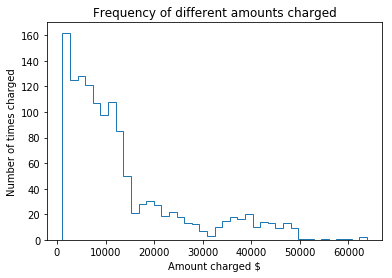

In [4]:
_=plt.hist(medical.charges,histtype='step',bins=40)
_=plt.title('Frequency of different amounts charged')
_=plt.ylabel('Number of times charged')
_=plt.xlabel('Amount charged $')

plt.show()

In [5]:
mean_of_charges=np.mean(medical.charges)
std_of_charges= np.std(medical.charges)
median_of_charges=np.median(medical.charges)

print('Assuming Normal Distribution:\n\n    The mean is: $',round(mean_of_charges,2),'\n    The STD is:  $',round(std_of_charges,2),sep='')
print('\nFor Reference the median is: $',round(median_of_charges,2),sep='')

Assuming Normal Distribution:

    The mean is: $13270.42
    The STD is:  $12105.48

For Reference the median is: $9382.03


__Q:__ The administrator is concerned that the actual average charge has fallen below 12000, threatening the hospital's operational model. On the assumption that these data represent a random sample of charges, how would you justify that these data allow you to answer that question? And what would be the most appropriate frequentist test, of the ones discussed so far, to apply?

__A:__    We can perform a t-test using this sample data with 1337 degrees of freedom that will tell us if it is likely that the average of all the medical charges in the hospital is at least 12000. 
   
   Because of the high number of samples, A z-test might give us a similiar answer if we use the standard deviation of the sample to estimate the sample's standard error and use it in place of the population's standard deviation. However, it is customary to use a t-test when the standard deviation of the population is unknown.

__Q:__ Given the nature of the administrator's concern, what is the appropriate confidence interval in this case? A one-sided or two-sided interval? Calculate the critical value and the relevant 95% confidence interval for the mean and comment on whether the administrator should be concerned?

__A:__ A one-sided, right-tailed confidence interval will allow us to determine if the average hospital charge's more than 12000. Since our sample mean of 13,270 is above the 12,545 of the one-sided 95% confidence interval, we can conclude with 95% confidence that the mean of the hospital is above 12000. 

   To calculate the maxium confidence interval of our sample of the mean, we can reverse the process in the cell below as shown in the cell below that one. We can be 99.993% sure the sample is from a distribution of higher than 12,000 meaning the average hospital charge is greater than 12,000

In [6]:
CL=0.95 # Confidence Level

Tscore=t.ppf(CL,len(medical)-1) # calculating T score for a value on the edge of the right tailed 95% confidence interval
                                # Based on assumption that mean of standard t distribution is 0 and the standard deviation is 1
    
SE=std_of_charges/np.sqrt(len(medical)) #standard error of sample 

CL_value= 12000+Tscore*SE # value at edge of 95% confbidence interval for our distribution of sample means of hospital charges

print('If the mean of our sample is above ',round(CL_value),' then we can be ',round(CL*100),'% sure the sample was taken from a distribution with a mean greater than 12000',sep='')

If the mean of our sample is above 12545.0 then we can be 95% sure the sample was taken from a distribution with a mean greater than 12000


In [7]:
CL_value=13270

new_Tscore=(CL_value-12000)/SE

new_CL=t.cdf(new_Tscore,len(medical)-1)*100

print('We can be ',round(new_CL,3),'% sure the sample was taken from a distribution with a mean greater than 12000',sep='')

We can be 99.993% sure the sample was taken from a distribution with a mean greater than 12000


The administrator then wants to know whether people with insurance really are charged a different amount to those without.

__Q:__ State the null and alternative hypothesis here. Use the _t_-test for the difference between means where the pooled standard deviation of the two groups is given by
\begin{equation}
s_p = \sqrt{\frac{(n_0 - 1)s^2_0 + (n_1 - 1)s^2_1}{n_0 + n_1 - 2}}
\end{equation}

and the *t* test statistic is then given by

\begin{equation}
t = \frac{\bar{x}_0 - \bar{x}_1}{s_p \sqrt{1/n_0 + 1/n_1}}.
\end{equation}

What assumption about the variances of the two groups are we making here?

__A:__ The null hypothesis is that there is no difference between the charges of those with insurance and those with it. The alternative hypothesis is that there is a signficant difference between the charges suggesting that people with insurance are charged differently than those without it. Here we are assuming both of the variances of the populations are the same. 

__Q:__ Perform this hypothesis test both manually, using the above formulae, and then using the appropriate function from [scipy.stats](https://docs.scipy.org/doc/scipy/reference/stats.html#statistical-tests) (hint, you're looking for a function to perform a _t_-test on two independent samples). For the manual approach, calculate the value of the test statistic and then its probability (the p-value). Verify you get the same results from both.

__A:__ For both tests, a Tscore of 11.89 and p-value of 0.0 was calculated (p-value is approxiamate). So we are sure there is a difference between the charges of those with insurance and those without

In [8]:
### Filtering those with insurance from those without

insurance_bool=medical.insuranceclaim==1

has_insurance=medical.loc[insurance_bool]

has_no_insurance=medical.loc[~insurance_bool]

In [9]:
### Manual Approach

## parameters of sample distributions calc

has_insurance_length=len(has_insurance.charges)
has_no_insurance_length=len(has_no_insurance.charges)

has_insurance_mean=np.mean(has_insurance.charges)
has_no_insurance_mean=np.mean(has_no_insurance.charges)

has_insurance_std=np.std(has_insurance.charges,ddof=1)
has_no_insurance_std=np.std(has_no_insurance.charges,ddof=1)


## Calc of T score

std_dev_pooled= np.sqrt(((has_insurance_length-1)*(has_insurance_std**2)+(has_no_insurance_length-1)*(has_no_insurance_std**2))/(has_insurance_length+has_no_insurance_length-2))
T_score= (has_insurance_mean-has_no_insurance_mean)/(std_dev_pooled*np.sqrt((1/has_insurance_length)+(1/has_no_insurance_length)))


# Degree of freedom for a difference of sample means distribution is 
# the sum of the degrees of freedom for each sample or n1-1+n2-1=n1+n2-2
p_value= 1-t.cdf(T_score,df=has_insurance_length+has_no_insurance_length-2)


print('By manually calculation, results are')
print('\nTscore is:',T_score)
print('P-Value is:',p_value)

By manually calculation, results are

Tscore is: 11.89329903087671
P-Value is: 0.0


In [12]:
### Automatic Approach

T_score_auto,p_value_auto=ttest_ind(has_insurance.charges,has_no_insurance.charges)

print('By automatic calculation, results are')
print('\nTscore is:',T_score_auto)
print('P-Value is:',p_value_auto)

By automatic calculation, results are

Tscore is: 11.893299030876712
P-Value is: 4.461230231620717e-31


Congratulations! Hopefully you got the exact same numerical results. This shows that you correctly calculated the numbers by hand. Secondly, you used the correct function and saw that it's much easier to use. All you need to do pass your data to it.

__Q:__ In the above calculations, we assumed the sample variances were equal. We may well suspect they are not (we'll explore this in another assignment). The calculation becomes a little more complicated to do by hand in this case, but we now know of a helpful function. Check the documentation for the function to tell it not to assume equal variances and perform the test again.

__A:__  by setting equal_var=False in ttest_ind

In [17]:
T_score_auto_new,p_value_auto_new=ttest_ind(has_insurance.charges,has_no_insurance.charges,equal_var=False)

print('By automatic calculation and assumming distributions have different variances results are')
print('\nTscore is:',T_score_auto_new)
print('P-Value is:',p_value_auto_new)

By automatic calculation and assumming distributions have different variances results are

Tscore is: 13.298031957975649
P-Value is: 1.1105103216309125e-37


__Q:__ Conceptual question: look through the documentation for statistical test functions in scipy.stats. You'll see the above _t_-test for a sample, but can you see an equivalent one for performing a *z*-test from a sample? Comment on your answer.

__A:__ There is no z-test equivalent, I think this is because for the z test to apply matematically there number of samples has to be infinite which is not possible for a computer. The t distribution approaches a normal curve for large sample sizes anyway so there is no need for an exact measure of the z-test which is not possible anyway.

## Learning outcomes

Having completed this project notebook, you now have good hands-on experience:
* using the central limit theorem to help you apply frequentist techniques to answer questions that pertain to very non-normally distributed data from the real world
* performing inference using such data to answer business questions
* forming a hypothesis and framing the null and alternative hypotheses
* testing this using a _t_-test